# Making a dataset 

In [14]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Loading/normalizing the data.

In [23]:
data = pd.read_csv('Aroma_Data_unsupervised.csv')
#data = pd.get_dummies(data)

data_X = data.drop(["Species", "ID"], 1)
data_y = data[['Species']]

scaler = preprocessing.MinMaxScaler()
names = data_X.columns
d = scaler.fit_transform(data_X)
data_norm_X = pd.DataFrame(d, columns=names)
data_norm_X.head()

C:\Users\rmadd\AppData\Local\Temp/ipykernel_12792/1312559818.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_X = data.drop(["Species", "ID"], 1)


flavor_sweet  flavor_sour  flavor_bitter  flavor_pleasant  flavor_grassy  \
0      0.151163     0.603261       0.550336         0.404878       1.000000   
1      0.174419     1.000000       0.523490         0.336585       0.481928   
2      0.034884     0.663043       0.503356         0.326829       0.674699   
3      0.581395     0.173913       0.261745         0.609756       0.493976   
4      0.511628     0.201087       0.255034         0.653659       0.036145   

   flavor_citrusy  flavor_terpene-like  Brix/Acid  ethyl_acetate  \
0        0.382979             0.670103   0.162393            0.0   
1        0.260638             0.505155   0.230769            0.0   
2        0.276596             0.567010   0.112536            0.0   
3        0.271277             0.226804   0.588319            0.0   
4        0.276596             0.164948   0.566952            0.0   

   methyl_butanoate  ...  Glutamine    Valine  Phenylalanine  Tryptophan  \
0               0.0  ...   0.378921  0.415960       0.564985    0.193905   
1               0.0  ...   0.275408  0.312147       0.778855    0.514286   
2               0.0  ...   0.508992  0.455508       0.889185    0.531048   
3               0.0  ...   0.106441  0.465395       0.157856    0.053714   
4               0.0  ...   0.297156  0.832627       0.278855    0.235810   

   Threonine   Leucine  Tyrosine  Histidine  Isoleucine  Methionine  
0   0.423358  0.271338  0.271919   0.384518    0.315271    0.327273  
1   0.440389  0.314650  0.260483   0.385787    0.256158    0.400000  
2   0.644769  0.355414  0.322745   0.517766    0.310345    0.536364  
3   0.206813  0.310828  0.307497   0.046954    0.339901    0.409091  
4   0.201946  0.552866  0.485388   0.275381    0.635468    0.718182  

[5 rows x 95 columns]

In [36]:
features = data_norm_X
features.head()

flavor_sweet  flavor_sour  flavor_bitter  flavor_pleasant  flavor_grassy  \
0      0.151163     0.603261       0.550336         0.404878       1.000000   
1      0.174419     1.000000       0.523490         0.336585       0.481928   
2      0.034884     0.663043       0.503356         0.326829       0.674699   
3      0.581395     0.173913       0.261745         0.609756       0.493976   
4      0.511628     0.201087       0.255034         0.653659       0.036145   

   flavor_citrusy  flavor_terpene-like  Brix/Acid  ethyl_acetate  \
0        0.382979             0.670103   0.162393            0.0   
1        0.260638             0.505155   0.230769            0.0   
2        0.276596             0.567010   0.112536            0.0   
3        0.271277             0.226804   0.588319            0.0   
4        0.276596             0.164948   0.566952            0.0   

   methyl_butanoate  ...  Glutamine    Valine  Phenylalanine  Tryptophan  \
0               0.0  ...   0.378921  0.415960       0.564985    0.193905   
1               0.0  ...   0.275408  0.312147       0.778855    0.514286   
2               0.0  ...   0.508992  0.455508       0.889185    0.531048   
3               0.0  ...   0.106441  0.465395       0.157856    0.053714   
4               0.0  ...   0.297156  0.832627       0.278855    0.235810   

   Threonine   Leucine  Tyrosine  Histidine  Isoleucine  Methionine  
0   0.423358  0.271338  0.271919   0.384518    0.315271    0.327273  
1   0.440389  0.314650  0.260483   0.385787    0.256158    0.400000  
2   0.644769  0.355414  0.322745   0.517766    0.310345    0.536364  
3   0.206813  0.310828  0.307497   0.046954    0.339901    0.409091  
4   0.201946  0.552866  0.485388   0.275381    0.635468    0.718182  

[5 rows x 95 columns]

## Correlation Analysis

In [63]:
data_norm_X.head()
cor = data_norm_X.corr()

In [60]:
# Removing the first row as it is self referential. 
cor[["Species"]].sort_values(by = "Species", ascending=False).head(11)[-10:]

Species
alpha-cubebene                   0.543396
dodecanal                        0.539767
elemol                           0.499175
flavor_bitter                    0.473811
caryophyllene_oxide              0.470829
alpha-pinene                     0.467558
p-mentha-1(7),8(10)-dien-9-ol.1  0.449021
delta_cadinene                   0.433714
terpinolene                      0.429061
alpha-copaene                    0.420643

# K means Cluster

c:\Python\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


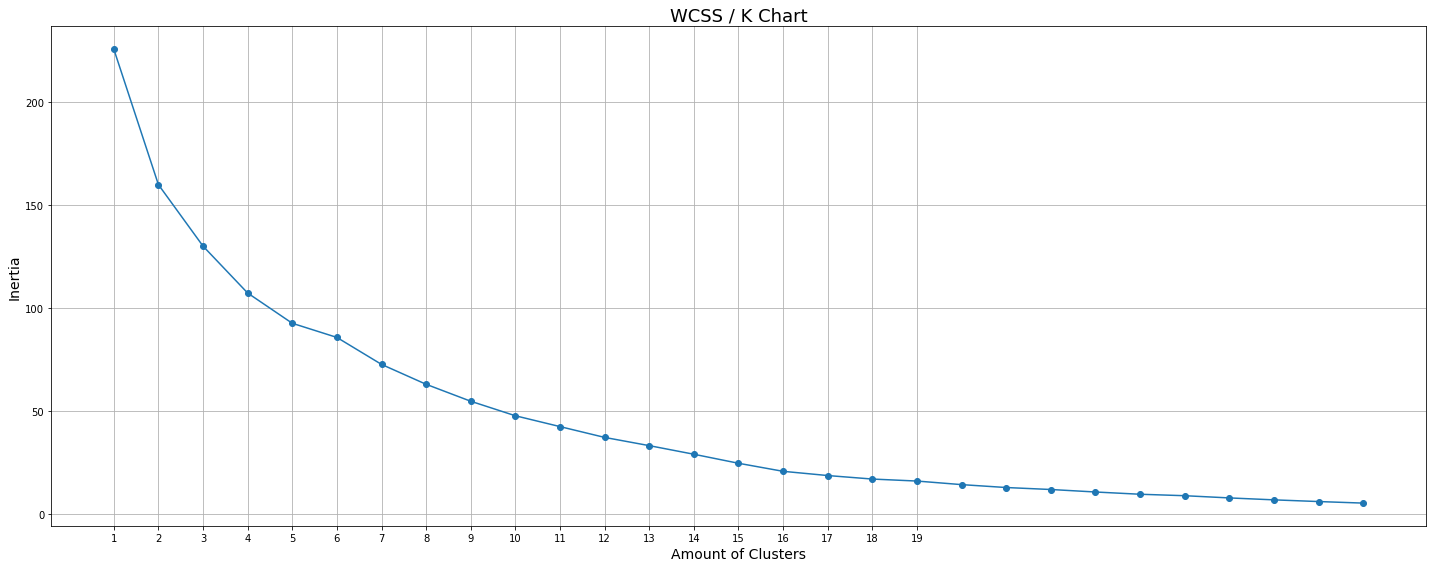

In [24]:
kmeans = KMeans(n_clusters=3)  

wcss = []

for k in range(1,30):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_norm_X)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,30),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

In [64]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = features.index.values
cluster_map['cluster'] = kmeans.labels_

In [ ]:
cluster_map

In [27]:
qqq = data_y["Species"].to_list()
qqq

['orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'sweet',
 'sweet',
 'sweet',
 'sweet',
 'sweet',
 'sweet',
 'sweet',
 'sweet',
 'sweet',
 'sweet',
 'sweet',
 'sweet',
 'sweet',
 'sweet',
 'sweet',
 'mandarin',
 'mandarin',
 'mandarin',
 'mandarin',
 'mandarin',
 'mandarin',
 'mandarin',
 'mandarin',
 'mandarin',
 'mandarin',
 'mandarin',
 'mandarin']

Hierarchical Clustering

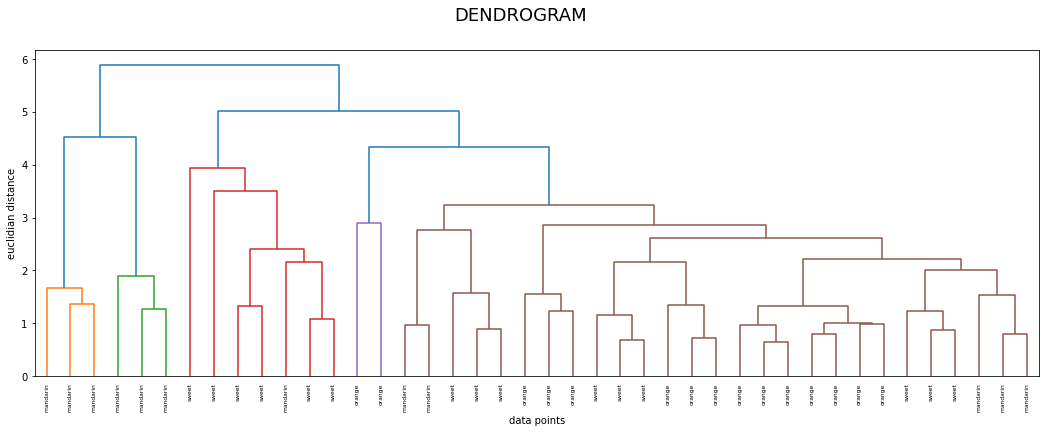

In [37]:
mergings = linkage(data_norm_X, method='complete')

plt.figure(figsize=(18,6))
dendrogram(mergings,
           labels = qqq,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.xlabel("data points")
plt.ylabel("euclidian distance")

plt.suptitle("DENDROGRAM",fontsize=18)
plt.show()

In [38]:
features.head()

flavor_sweet  flavor_sour  flavor_bitter  flavor_pleasant  flavor_grassy  \
0      0.151163     0.603261       0.550336         0.404878       1.000000   
1      0.174419     1.000000       0.523490         0.336585       0.481928   
2      0.034884     0.663043       0.503356         0.326829       0.674699   
3      0.581395     0.173913       0.261745         0.609756       0.493976   
4      0.511628     0.201087       0.255034         0.653659       0.036145   

   flavor_citrusy  flavor_terpene-like  Brix/Acid  ethyl_acetate  \
0        0.382979             0.670103   0.162393            0.0   
1        0.260638             0.505155   0.230769            0.0   
2        0.276596             0.567010   0.112536            0.0   
3        0.271277             0.226804   0.588319            0.0   
4        0.276596             0.164948   0.566952            0.0   

   methyl_butanoate  ...  Glutamine    Valine  Phenylalanine  Tryptophan  \
0               0.0  ...   0.378921  0.415960       0.564985    0.193905   
1               0.0  ...   0.275408  0.312147       0.778855    0.514286   
2               0.0  ...   0.508992  0.455508       0.889185    0.531048   
3               0.0  ...   0.106441  0.465395       0.157856    0.053714   
4               0.0  ...   0.297156  0.832627       0.278855    0.235810   

   Threonine   Leucine  Tyrosine  Histidine  Isoleucine  Methionine  
0   0.423358  0.271338  0.271919   0.384518    0.315271    0.327273  
1   0.440389  0.314650  0.260483   0.385787    0.256158    0.400000  
2   0.644769  0.355414  0.322745   0.517766    0.310345    0.536364  
3   0.206813  0.310828  0.307497   0.046954    0.339901    0.409091  
4   0.201946  0.552866  0.485388   0.275381    0.635468    0.718182  

[5 rows x 95 columns]

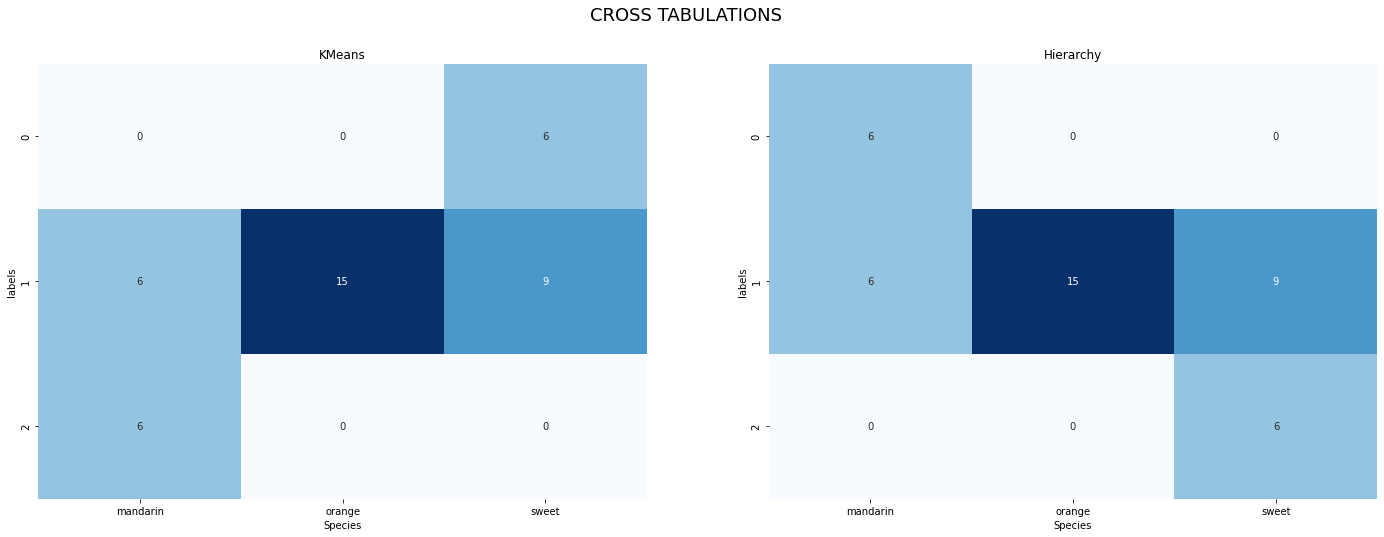

In [39]:
# I drop labels since we only want to use features.

# kmeans
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(features)

# cross tabulation table for kmeans
df1 = pd.DataFrame({'labels':kmeans_predict,"Species":data['Species']})
ct1 = pd.crosstab(df1['labels'],df1['Species'])


# hierarchy
hc_cluster = AgglomerativeClustering(n_clusters=3)
hc_predict = hc_cluster.fit_predict(features)

# cross tabulation table for Hierarchy
df2 = pd.DataFrame({'labels':hc_predict,"Species":data['Species']})
ct2 = pd.crosstab(df2['labels'],df2['Species'])


plt.figure(figsize=(24,8))
plt.suptitle("CROSS TABULATIONS",fontsize=18)
plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")

plt.subplot(1,2,2)
plt.title("Hierarchy")
sns.heatmap(ct2,annot=True,cbar=False,cmap="Blues")

plt.show()

## PCA

In [40]:
# this should not have changed, just a reminder.
data = pd.read_csv('Aroma_Data_unsupervised.csv')

data_X = data.drop(["Species", "ID"], 1);
data_y = data[['Species']];


scaler = preprocessing.MinMaxScaler();
names = data_X.columns;
d = scaler.fit_transform(data_X);
data_norm_X = pd.DataFrame(d, columns=names);
data_norm_X.head()


C:\Users\rmadd\AppData\Local\Temp/ipykernel_12792/2885567260.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data_X = data.drop(["Species", "ID"], 1);


flavor_sweet  flavor_sour  flavor_bitter  flavor_pleasant  flavor_grassy  \
0      0.151163     0.603261       0.550336         0.404878       1.000000   
1      0.174419     1.000000       0.523490         0.336585       0.481928   
2      0.034884     0.663043       0.503356         0.326829       0.674699   
3      0.581395     0.173913       0.261745         0.609756       0.493976   
4      0.511628     0.201087       0.255034         0.653659       0.036145   

   flavor_citrusy  flavor_terpene-like  Brix/Acid  ethyl_acetate  \
0        0.382979             0.670103   0.162393            0.0   
1        0.260638             0.505155   0.230769            0.0   
2        0.276596             0.567010   0.112536            0.0   
3        0.271277             0.226804   0.588319            0.0   
4        0.276596             0.164948   0.566952            0.0   

   methyl_butanoate  ...  Glutamine    Valine  Phenylalanine  Tryptophan  \
0               0.0  ...   0.378921  0.415960       0.564985    0.193905   
1               0.0  ...   0.275408  0.312147       0.778855    0.514286   
2               0.0  ...   0.508992  0.455508       0.889185    0.531048   
3               0.0  ...   0.106441  0.465395       0.157856    0.053714   
4               0.0  ...   0.297156  0.832627       0.278855    0.235810   

   Threonine   Leucine  Tyrosine  Histidine  Isoleucine  Methionine  
0   0.423358  0.271338  0.271919   0.384518    0.315271    0.327273  
1   0.440389  0.314650  0.260483   0.385787    0.256158    0.400000  
2   0.644769  0.355414  0.322745   0.517766    0.310345    0.536364  
3   0.206813  0.310828  0.307497   0.046954    0.339901    0.409091  
4   0.201946  0.552866  0.485388   0.275381    0.635468    0.718182  

[5 rows x 95 columns]

In [41]:
# Run this cell only once. 
ID_df = data["ID"]
species_df = data["Species"]
data_norm_X = pd.concat([data_norm_X, ID_df, species_df], axis = 1)
data_norm_X.set_index(["ID"])

flavor_sweet  flavor_sour  flavor_bitter  flavor_pleasant  \
ID                                                                   
5393052      0.151163     0.603261       0.550336         0.404878   
9203419      0.174419     1.000000       0.523490         0.336585   
2289848      0.034884     0.663043       0.503356         0.326829   
6455915      0.581395     0.173913       0.261745         0.609756   
4491987      0.511628     0.201087       0.255034         0.653659   
4018092      0.500000     0.146739       0.228188         0.887805   
8429829      0.577519     0.157609       0.013423         0.458537   
5455614      0.472868     0.385870       0.020134         0.385366   
3298943      0.294574     0.000000       0.000000         0.639024   
7510250      0.461240     0.375000       0.053691         0.439024   
6698996      0.410853     0.266304       0.040268         0.507317   
2119442      0.352713     0.766304       0.060403         0.458537   
5971144      0.519380     0.505435       0.067114         0.478049   
4800001      0.492248     0.375000       0.355705         0.429268   
2583692      0.414729     0.228261       0.046980         0.307317   
7101413      1.000000     0.559783       0.261745         0.941463   
9645695      0.988372     0.668478       0.248322         0.931707   
1943931      0.972868     0.576087       0.140940         1.000000   
4819796      0.953488     0.413043       0.154362         0.965854   
6459416      0.794574     0.385870       0.046980         0.790244   
7909824      0.810078     0.603261       0.255034         0.804878   
2978631      0.127907     0.141304       0.187919         0.273171   
5498277      0.201550     0.054348       0.201342         0.263415   
7360343      0.120155     0.233696       0.308725         0.219512   
1952214      0.000000     0.494565       0.322148         0.000000   
4839926      0.228682     0.375000       0.302013         0.185366   
9802222      0.166667     0.407609       0.201342         0.263415   
2868965      0.507752     0.456522       0.315436         0.639024   
6545276      0.472868     0.576087       0.543624         0.570732   
7567710      0.488372     0.581522       0.369128         0.702439   
8591130      0.492248     0.309783       0.416107         0.541463   
6318096      0.375969     0.538043       0.348993         0.556098   
7700257      0.585271     0.320652       0.422819         0.629268   
3466387      0.143411     0.451087       0.865772         0.278049   
5867534      0.186047     0.603261       1.000000         0.063415   
6097003      0.197674     0.467391       0.731544         0.429268   
4460596      0.515504     0.750000       0.255034         0.492683   
5399458      0.375969     0.902174       0.429530         0.463415   
5635946      0.449612     0.690217       0.302013         0.429268   
6938131      0.631783     0.494565       0.248322         0.639024   
5446027      0.600775     0.543478       0.295302         0.614634   
3218464      0.662791     0.451087       0.234899         0.673171   

         flavor_grassy  flavor_citrusy  flavor_terpene-like  Brix/Acid  \
ID                                                                       
5393052       1.000000        0.382979             0.670103   0.162393   
9203419       0.481928        0.260638             0.505155   0.230769   
2289848       0.674699        0.276596             0.567010   0.112536   
6455915       0.493976        0.271277             0.226804   0.588319   
4491987       0.036145        0.276596             0.164948   0.566952   
4018092       0.566265        0.228723             0.144330   0.767806   
8429829       0.349398        0.505319             0.206186   0.480057   
5455614       0.277108        0.329787             0.391753   0.603989   
3298943       0.409639        0.239362             0.340206   0.324786   
7510250       0.277108        0.627660             0.371134   0.394587   
6698996       0.253012        0.648936  

In [42]:
# Label encoding from non numerical to numerical.

data_norm_X.Species.replace({"orange":0, "sweet": 1, "mandarin":2}, inplace = True)

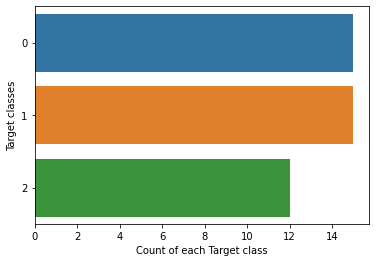

In [43]:
sns.countplot(y=data_norm_X.Species ,data=data_norm_X)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

IndexError: index 10 is out of bounds for axis 0 with size 10

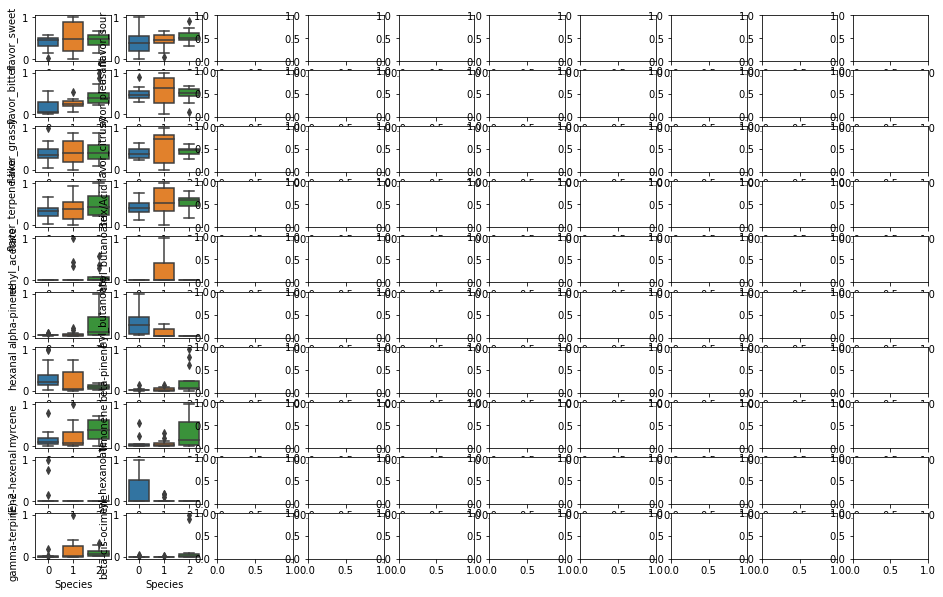

In [44]:
# Let's see some plots

fig,ax = plt.subplots(nrows = 10, ncols=10, figsize=(16,10))
row = 0
col = 0
for i in range(len(data_norm_X.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = data_norm_X['Species'], y = data_norm_X[data_norm_X.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

# cannot get it to work, do not care at this point.

In [45]:
# p = sns.pairplot(data_norm_X, hue = "Species")

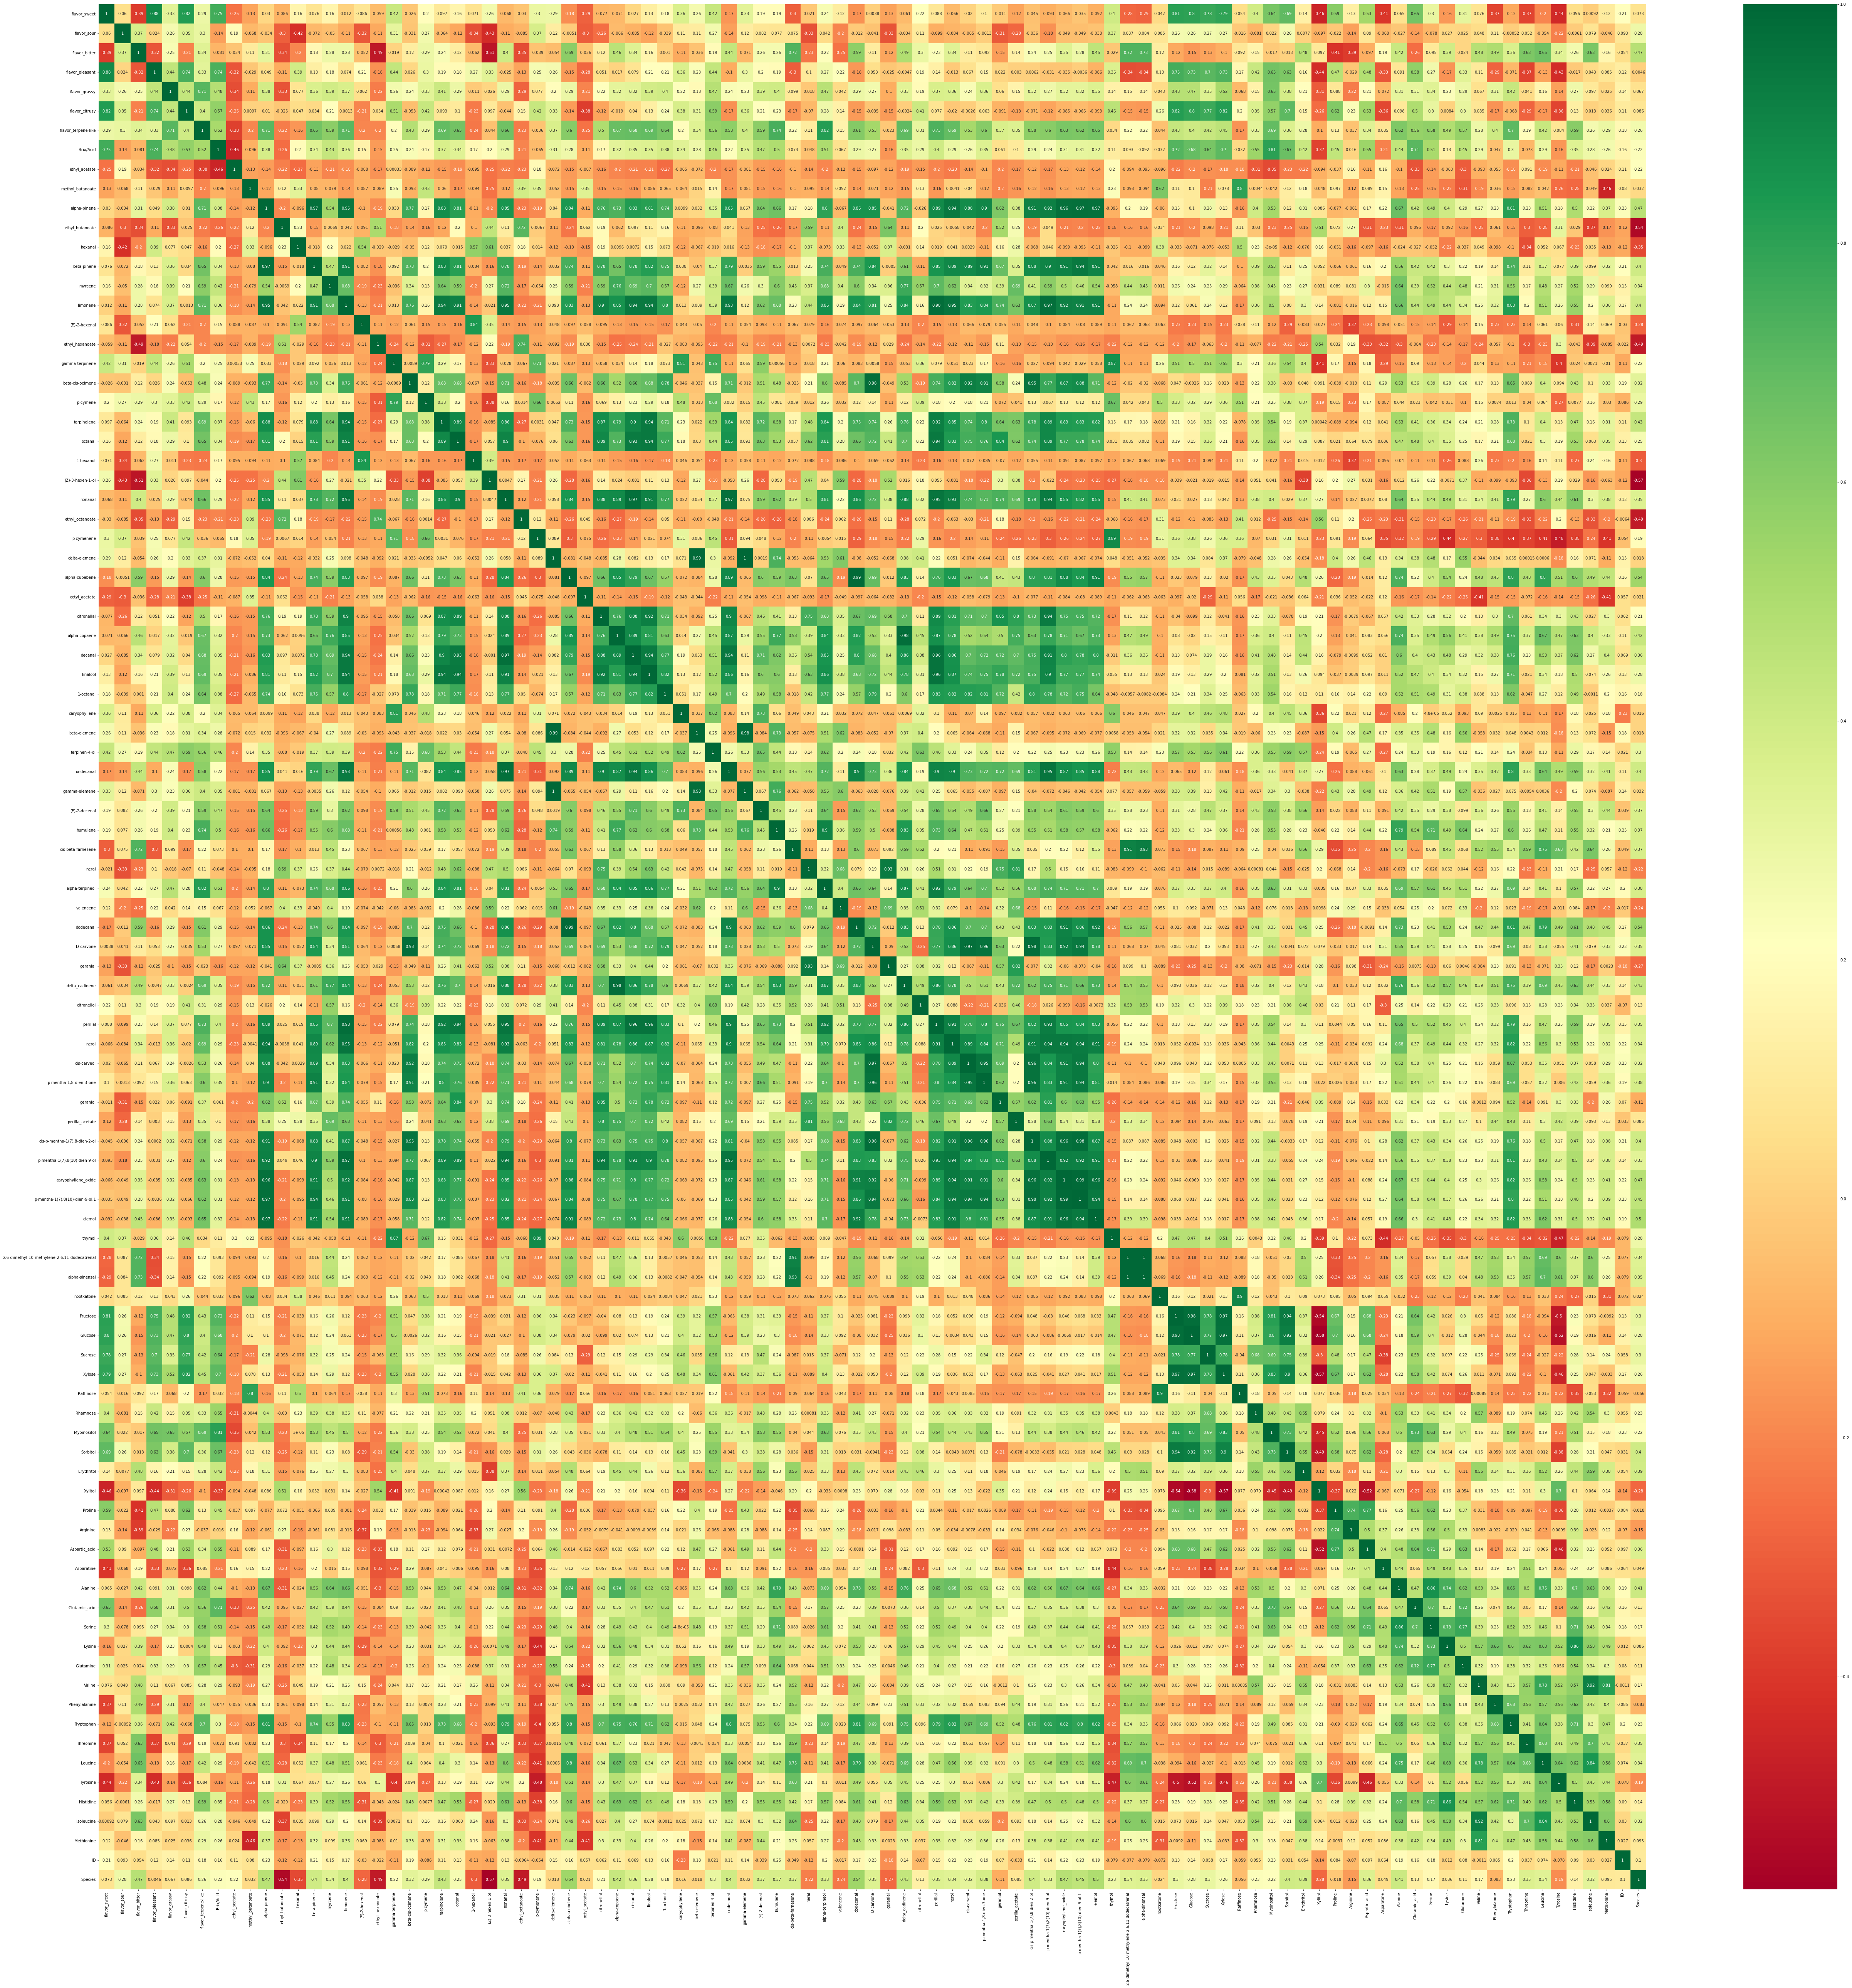

In [46]:
plt.figure(figsize=(90,90))
p=sns.heatmap(data_norm_X.corr(), annot=True,cmap='RdYlGn') 

In [47]:
X = data_norm_X.drop(['Species'], axis = 1)
y = data_norm_X.Species
pca = PCA()
X_new = pca.fit_transform(X)

In [49]:
pca.get_covariance()

array([[ 6.74027899e-02,  3.42508884e-03, -2.22499092e-02, ...,
         5.10267480e-05,  8.68244068e-03,  1.14202364e+05],
       [ 3.42508884e-03,  4.79916889e-02,  1.80592172e-02, ...,
         3.68310743e-03, -2.89117695e-03,  4.35055313e+04],
       [-2.22499092e-02,  1.80592172e-02,  4.84288279e-02, ...,
         2.97093996e-02,  1.02947252e-02,  2.54031843e+04],
       ...,
       [ 5.10267480e-05,  3.68310743e-03,  2.97093996e-02, ...,
         4.55267417e-02,  3.68319053e-02,  1.37227208e+04],
       [ 8.68244068e-03, -2.89117695e-03,  1.02947252e-02, ...,
         3.68319053e-02,  8.22353884e-02,  1.64553083e+04],
       [ 1.14202364e+05,  4.35055313e+04,  2.54031843e+04, ...,
         1.37227208e+04,  1.64553083e+04,  4.60016793e+12]])

In [50]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([1.00000000e+00, 4.15664394e-13, 1.75598542e-13, 1.05595390e-13,
       8.11953065e-14, 7.64634397e-14, 5.25905996e-14, 4.59591706e-14,
       4.32535164e-14, 2.91943582e-14, 2.40820490e-14, 2.18030373e-14,
       1.69113804e-14, 1.25797486e-14, 1.09781293e-14, 9.13070456e-15,
       7.34887540e-15, 7.02509268e-15, 6.10528032e-15, 4.33564674e-15,
       4.08411067e-15, 3.55744822e-15, 3.30955687e-15, 2.62207832e-15,
       2.24739036e-15, 2.05970055e-15, 1.85156892e-15, 1.58703343e-15,
       1.52457640e-15, 1.26818645e-15, 9.87031513e-16, 8.62854074e-16,
       7.72757928e-16, 6.73305336e-16, 5.45935934e-16, 4.88673267e-16,
       3.50354145e-16, 3.14242326e-16, 2.24843958e-16, 1.70866638e-16,
       1.22484405e-16, 9.98398792e-33])

Investigating further. It appears that the ID is ruining everything. Removing it then running PCA again.

In [51]:
qq = data_norm_X.drop(["ID"], axis=1)
qq.head()

flavor_sweet  flavor_sour  flavor_bitter  flavor_pleasant  flavor_grassy  \
0      0.151163     0.603261       0.550336         0.404878       1.000000   
1      0.174419     1.000000       0.523490         0.336585       0.481928   
2      0.034884     0.663043       0.503356         0.326829       0.674699   
3      0.581395     0.173913       0.261745         0.609756       0.493976   
4      0.511628     0.201087       0.255034         0.653659       0.036145   

   flavor_citrusy  flavor_terpene-like  Brix/Acid  ethyl_acetate  \
0        0.382979             0.670103   0.162393            0.0   
1        0.260638             0.505155   0.230769            0.0   
2        0.276596             0.567010   0.112536            0.0   
3        0.271277             0.226804   0.588319            0.0   
4        0.276596             0.164948   0.566952            0.0   

   methyl_butanoate  ...    Valine  Phenylalanine  Tryptophan  Threonine  \
0               0.0  ...  0.415960       0.564985    0.193905   0.423358   
1               0.0  ...  0.312147       0.778855    0.514286   0.440389   
2               0.0  ...  0.455508       0.889185    0.531048   0.644769   
3               0.0  ...  0.465395       0.157856    0.053714   0.206813   
4               0.0  ...  0.832627       0.278855    0.235810   0.201946   

    Leucine  Tyrosine  Histidine  Isoleucine  Methionine  Species  
0  0.271338  0.271919   0.384518    0.315271    0.327273        0  
1  0.314650  0.260483   0.385787    0.256158    0.400000        0  
2  0.355414  0.322745   0.517766    0.310345    0.536364        0  
3  0.310828  0.307497   0.046954    0.339901    0.409091        0  
4  0.552866  0.485388   0.275381    0.635468    0.718182        0  

[5 rows x 96 columns]

In [52]:
#Splitting test and train



X_sweet_train, X_sweet_test, y_sweet_train, y_sweet_test = train_test_split(qq.loc[:, qq.columns != "Species"], qq["Species"], test_size = 0.25, random_state= 42)

In [53]:
# PCA
def pca_dec(data, n):
  pca = PCA(n)
  X_dec = pca.fit_transform(data)
  return X_dec, pca

#Decomposing the train set:
pca_train_results, pca_train = pca_dec(X_sweet_train, 10)

#Decomposing the test set:
pca_test_results, pca_test = pca_dec(X_sweet_test, 10)

#Creating a table with the explained variance ratio
names_pcas = [f"PCA Component {i}" for i in range(1, 11, 1)]
scree = pd.DataFrame(list(zip(names_pcas, pca_train.explained_variance_ratio_)), columns=["Component", "Explained Variance Ratio"])
print(scree)

          Component  Explained Variance Ratio
0   PCA Component 1                  0.361255
1   PCA Component 2                  0.172897
2   PCA Component 3                  0.097081
3   PCA Component 4                  0.078179
4   PCA Component 5                  0.055034
5   PCA Component 6                  0.045540
6   PCA Component 7                  0.037932
7   PCA Component 8                  0.028990
8   PCA Component 9                  0.024991
9  PCA Component 10                  0.020271


In [54]:
#Sorting the values of the first principal component by how large each one is
df = pd.DataFrame({'PCA':pca_train.components_[0], 'Variable Names':list(X_sweet_train.columns)})
df = df.sort_values('PCA', ascending=False)

#Sorting the absolute values of the first principal component by magnitude
df2 = pd.DataFrame(df)
df2['PCA']=df2['PCA'].apply(np.absolute)
df2 = df2.sort_values('PCA', ascending=False)
#print(df2['Variable Names'][0:11])

df.head(20)

PCA                 Variable Names
50  0.215153                 delta_cadinene
29  0.204122                 alpha-cubebene
32  0.193934                  alpha-copaene
33  0.184852                        decanal
39  0.172597                      undecanal
52  0.167941                       perillal
47  0.167739                      dodecanal
15  0.167591                       limonene
25  0.165891                        nonanal
81  0.162155                        Alanine
45  0.159532                alpha-terpineol
62  0.158203                         elemol
21  0.157355                    terpinolene
34  0.149525                       linalool
59  0.149033  p-mentha-1(7),8(10)-dien-9-ol
10  0.148950                   alpha-pinene
6   0.146342            flavor_terpene-like
88  0.145665                     Tryptophan
53  0.142838                          nerol
60  0.137846            caryophyllene_oxide

In [55]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)



In [56]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [57]:
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.5172413793103449 %
Test score after PCA 0.3076923076923077 %
